## Regresion Polinomial & Feature engineering

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [56]:
data.head(11)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Analisis exploratorio Simple para la eleccion de las 3 features mas significativas.

**Matriz de correlacion**

In [16]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Por los bajos parametros que se obtienen en la matriz de correlacion, no se utilizara este criterio para la eleccion de la mejro feature

**Analisis grafico**

In [25]:
Y_real = data['quality']
dictX = {0:'fixed acidity', 1:'volatile acidity',2:'citric acid',3:'residual sugar',4:'chlorides',
         5:'free sulfur dioxide',6:'total sulfur dioxide',7:'density',8:'pH',9:'sulphates', 10:'alcohol'}

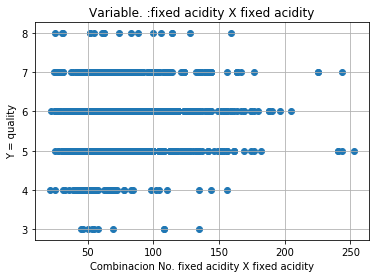

0      54.76
1      60.84
2      60.84
3     125.44
4      54.76
5      54.76
6      62.41
7      53.29
8      60.84
9      56.25
10     44.89
Name: fixed acidity, dtype: float64


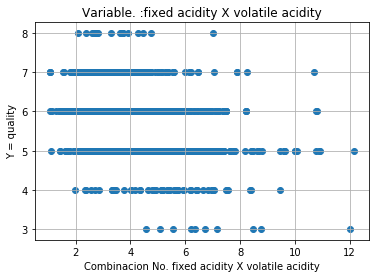

0     5.180
1     6.864
2     5.928
3     3.136
4     5.180
5     4.884
6     4.740
7     4.745
8     4.524
9     3.750
10    3.886
dtype: float64


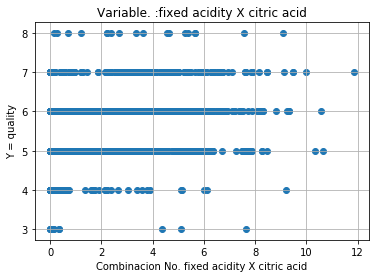

0     0.000
1     0.000
2     0.312
3     6.272
4     0.000
5     0.000
6     0.474
7     0.000
8     0.156
9     2.700
10    0.536
dtype: float64


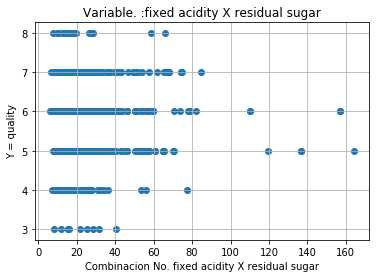

0     14.06
1     20.28
2     17.94
3     21.28
4     14.06
5     13.32
6     12.64
7      8.76
8     15.60
9     45.75
10    12.06
dtype: float64


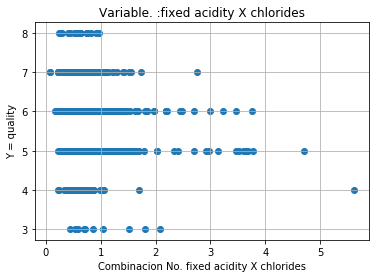

0     0.5624
1     0.7644
2     0.7176
3     0.8400
4     0.5624
5     0.5550
6     0.5451
7     0.4745
8     0.5694
9     0.5325
10    0.6499
dtype: float64


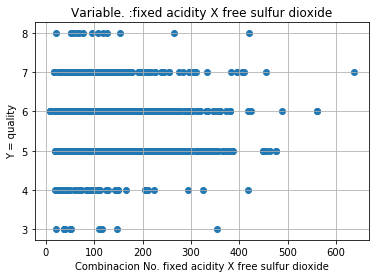

0      81.4
1     195.0
2     117.0
3     190.4
4      81.4
5      96.2
6     118.5
7     109.5
8      70.2
9     127.5
10    100.5
dtype: float64


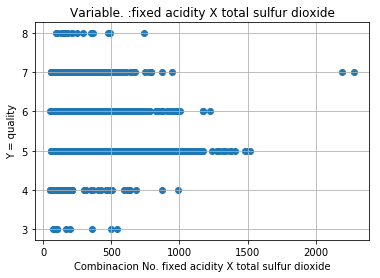

0     251.6
1     522.6
2     421.2
3     672.0
4     251.6
5     296.0
6     466.1
7     153.3
8     140.4
9     765.0
10    435.5
dtype: float64


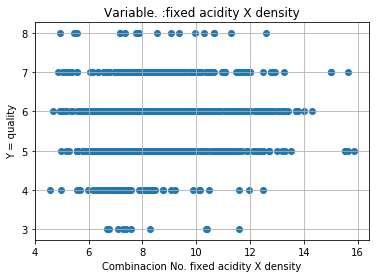

0      7.38372
1      7.77504
2      7.77660
3     11.17760
4      7.38372
5      7.38372
6      7.87156
7      7.26058
8      7.77504
9      7.48350
10     6.67253
dtype: float64


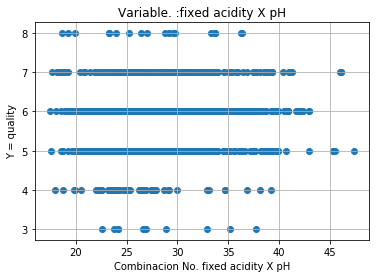

0     25.974
1     24.960
2     25.428
3     35.392
4     25.974
5     25.974
6     26.070
7     24.747
8     26.208
9     25.125
10    21.976
dtype: float64


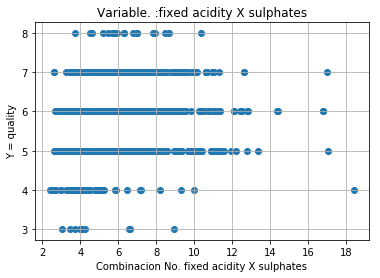

0     4.144
1     5.304
2     5.070
3     6.496
4     4.144
5     4.144
6     3.634
7     3.431
8     4.446
9     6.000
10    3.618
dtype: float64


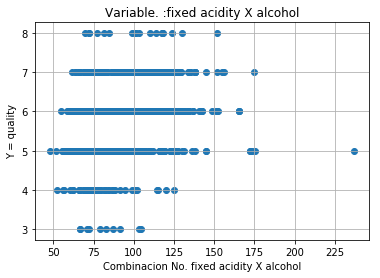

0      69.56
1      76.44
2      76.44
3     109.76
4      69.56
5      69.56
6      74.26
7      73.00
8      74.10
9      78.75
10     61.64
dtype: float64


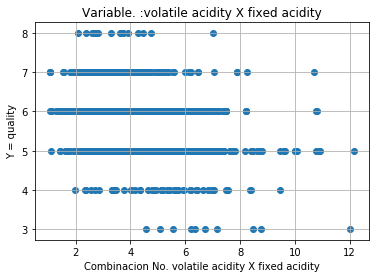

0     5.180
1     6.864
2     5.928
3     3.136
4     5.180
5     4.884
6     4.740
7     4.745
8     4.524
9     3.750
10    3.886
dtype: float64


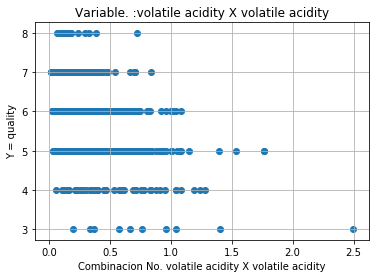

0     0.4900
1     0.7744
2     0.5776
3     0.0784
4     0.4900
5     0.4356
6     0.3600
7     0.4225
8     0.3364
9     0.2500
10    0.3364
Name: volatile acidity, dtype: float64


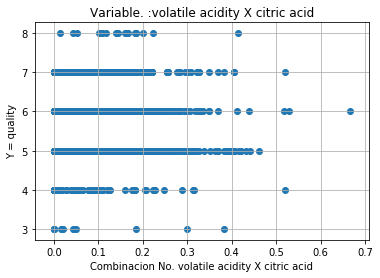

0     0.0000
1     0.0000
2     0.0304
3     0.1568
4     0.0000
5     0.0000
6     0.0360
7     0.0000
8     0.0116
9     0.1800
10    0.0464
dtype: float64


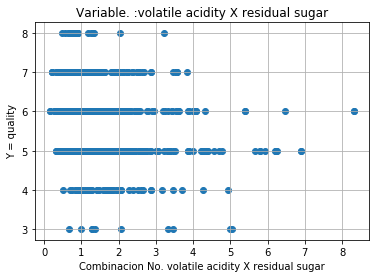

0     1.330
1     2.288
2     1.748
3     0.532
4     1.330
5     1.188
6     0.960
7     0.780
8     1.160
9     3.050
10    1.044
dtype: float64


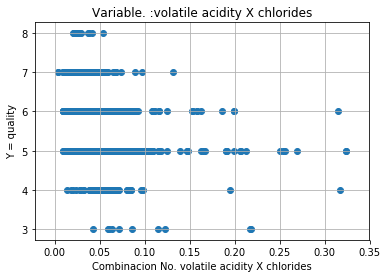

0     0.05320
1     0.08624
2     0.06992
3     0.02100
4     0.05320
5     0.04950
6     0.04140
7     0.04225
8     0.04234
9     0.03550
10    0.05626
dtype: float64


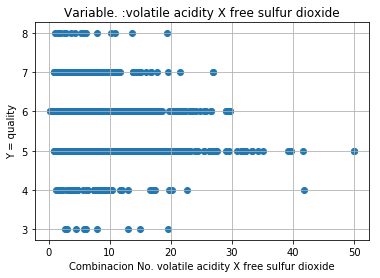

0      7.70
1     22.00
2     11.40
3      4.76
4      7.70
5      8.58
6      9.00
7      9.75
8      5.22
9      8.50
10     8.70
dtype: float64


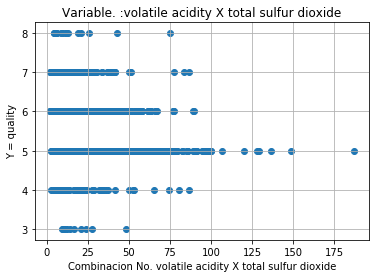

0     23.80
1     58.96
2     41.04
3     16.80
4     23.80
5     26.40
6     35.40
7     13.65
8     10.44
9     51.00
10    37.70
dtype: float64


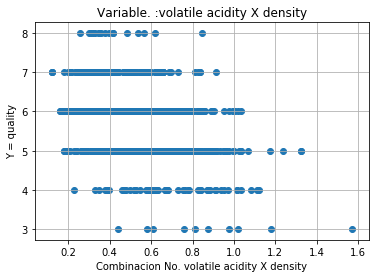

0     0.698460
1     0.877184
2     0.757720
3     0.279440
4     0.698460
5     0.658548
6     0.597840
7     0.646490
8     0.578144
9     0.498900
10    0.577622
dtype: float64


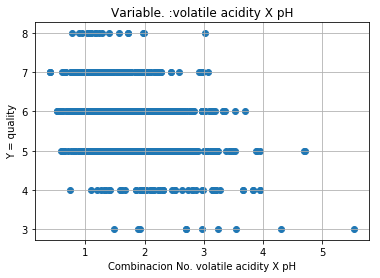

0     2.4570
1     2.8160
2     2.4776
3     0.8848
4     2.4570
5     2.3166
6     1.9800
7     2.2035
8     1.9488
9     1.6750
10    1.9024
dtype: float64


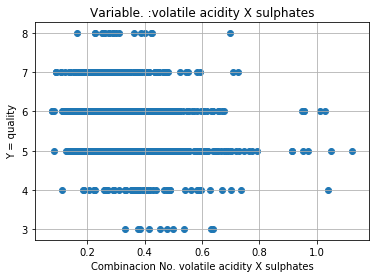

0     0.3920
1     0.5984
2     0.4940
3     0.1624
4     0.3920
5     0.3696
6     0.2760
7     0.3055
8     0.3306
9     0.4000
10    0.3132
dtype: float64


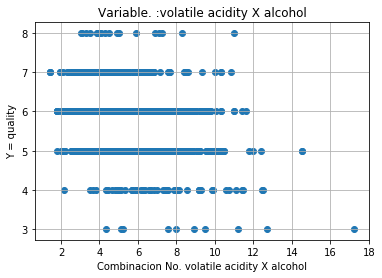

0     6.580
1     8.624
2     7.448
3     2.744
4     6.580
5     6.204
6     5.640
7     6.500
8     5.510
9     5.250
10    5.336
dtype: float64


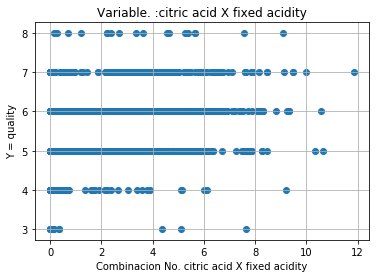

0     0.000
1     0.000
2     0.312
3     6.272
4     0.000
5     0.000
6     0.474
7     0.000
8     0.156
9     2.700
10    0.536
dtype: float64


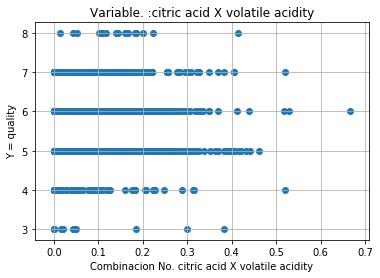

0     0.0000
1     0.0000
2     0.0304
3     0.1568
4     0.0000
5     0.0000
6     0.0360
7     0.0000
8     0.0116
9     0.1800
10    0.0464
dtype: float64


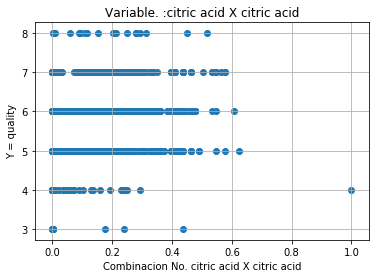

0     0.0000
1     0.0000
2     0.0016
3     0.3136
4     0.0000
5     0.0000
6     0.0036
7     0.0000
8     0.0004
9     0.1296
10    0.0064
Name: citric acid, dtype: float64


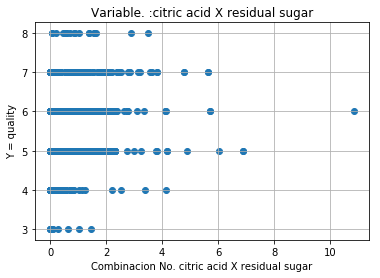

0     0.000
1     0.000
2     0.092
3     1.064
4     0.000
5     0.000
6     0.096
7     0.000
8     0.040
9     2.196
10    0.144
dtype: float64


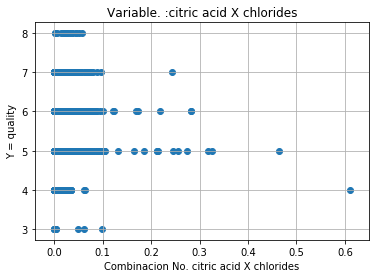

0     0.00000
1     0.00000
2     0.00368
3     0.04200
4     0.00000
5     0.00000
6     0.00414
7     0.00000
8     0.00146
9     0.02556
10    0.00776
dtype: float64


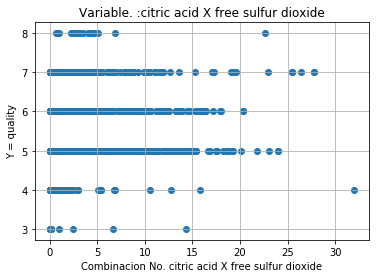

0     0.00
1     0.00
2     0.60
3     9.52
4     0.00
5     0.00
6     0.90
7     0.00
8     0.18
9     6.12
10    1.20
dtype: float64


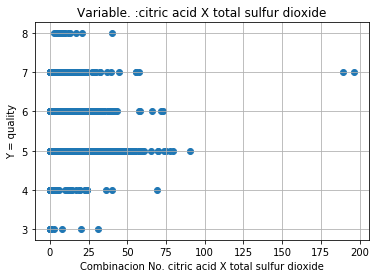

0      0.00
1      0.00
2      2.16
3     33.60
4      0.00
5      0.00
6      3.54
7      0.00
8      0.36
9     36.72
10     5.20
dtype: float64


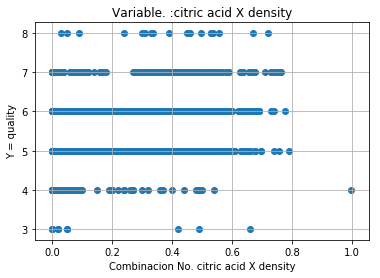

0     0.000000
1     0.000000
2     0.039880
3     0.558880
4     0.000000
5     0.000000
6     0.059784
7     0.000000
8     0.019936
9     0.359208
10    0.079672
dtype: float64


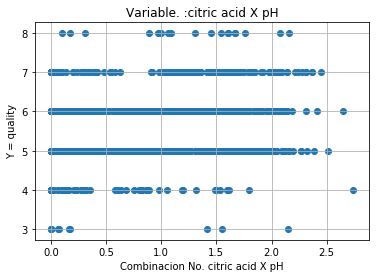

0     0.0000
1     0.0000
2     0.1304
3     1.7696
4     0.0000
5     0.0000
6     0.1980
7     0.0000
8     0.0672
9     1.2060
10    0.2624
dtype: float64


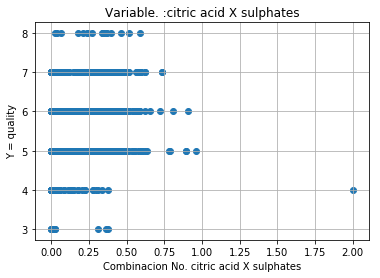

0     0.0000
1     0.0000
2     0.0260
3     0.3248
4     0.0000
5     0.0000
6     0.0276
7     0.0000
8     0.0114
9     0.2880
10    0.0432
dtype: float64


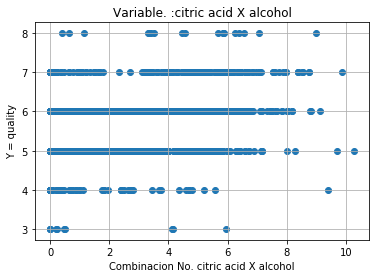

0     0.000
1     0.000
2     0.392
3     5.488
4     0.000
5     0.000
6     0.564
7     0.000
8     0.190
9     3.780
10    0.736
dtype: float64


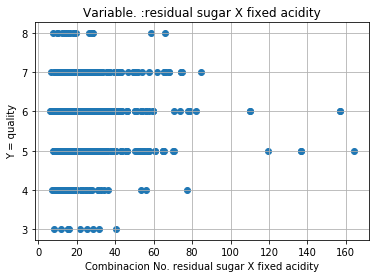

0     14.06
1     20.28
2     17.94
3     21.28
4     14.06
5     13.32
6     12.64
7      8.76
8     15.60
9     45.75
10    12.06
dtype: float64


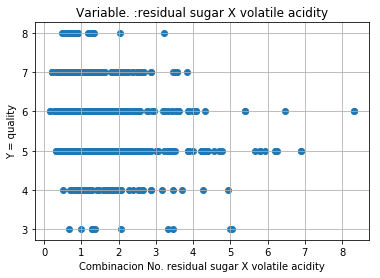

0     1.330
1     2.288
2     1.748
3     0.532
4     1.330
5     1.188
6     0.960
7     0.780
8     1.160
9     3.050
10    1.044
dtype: float64


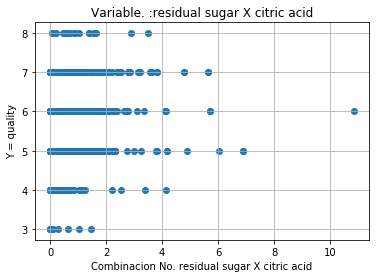

0     0.000
1     0.000
2     0.092
3     1.064
4     0.000
5     0.000
6     0.096
7     0.000
8     0.040
9     2.196
10    0.144
dtype: float64


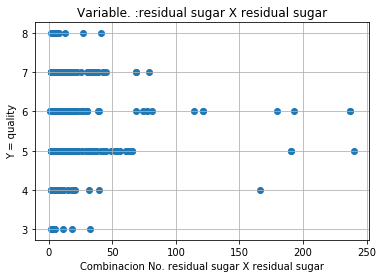

0      3.61
1      6.76
2      5.29
3      3.61
4      3.61
5      3.24
6      2.56
7      1.44
8      4.00
9     37.21
10     3.24
Name: residual sugar, dtype: float64


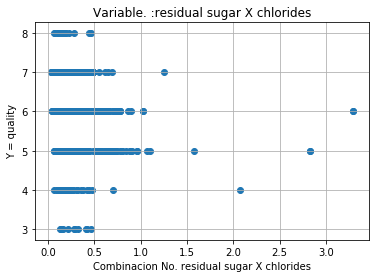

0     0.1444
1     0.2548
2     0.2116
3     0.1425
4     0.1444
5     0.1350
6     0.1104
7     0.0780
8     0.1460
9     0.4331
10    0.1746
dtype: float64


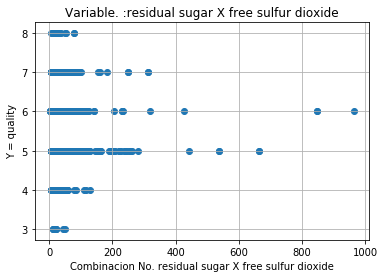

0      20.9
1      65.0
2      34.5
3      32.3
4      20.9
5      23.4
6      24.0
7      18.0
8      18.0
9     103.7
10     27.0
dtype: float64


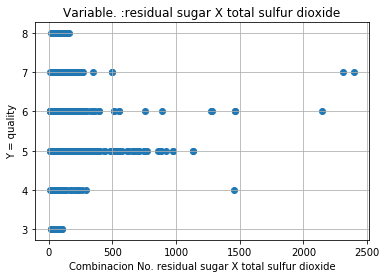

0      64.6
1     174.2
2     124.2
3     114.0
4      64.6
5      72.0
6      94.4
7      25.2
8      36.0
9     622.2
10    117.0
dtype: float64


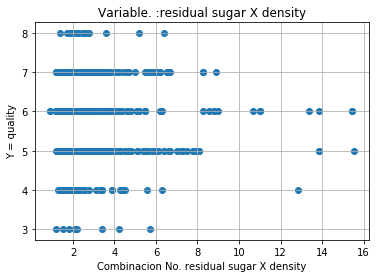

0     1.89582
1     2.59168
2     2.29310
3     1.89620
4     1.89582
5     1.79604
6     1.59424
7     1.19352
8     1.99360
9     6.08658
10    1.79262
dtype: float64


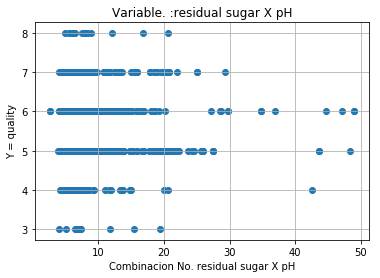

0      6.669
1      8.320
2      7.498
3      6.004
4      6.669
5      6.318
6      5.280
7      4.068
8      6.720
9     20.435
10     5.904
dtype: float64


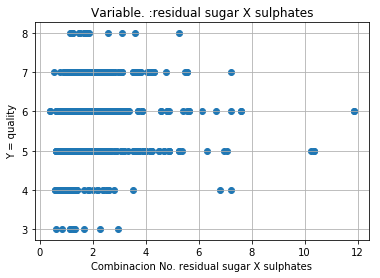

0     1.064
1     1.768
2     1.495
3     1.102
4     1.064
5     1.008
6     0.736
7     0.564
8     1.140
9     4.880
10    0.972
dtype: float64


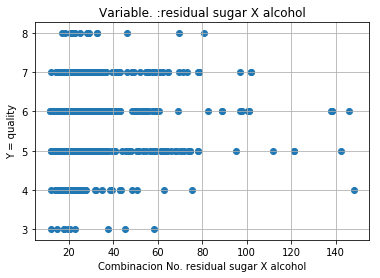

0     17.86
1     25.48
2     22.54
3     18.62
4     17.86
5     16.92
6     15.04
7     12.00
8     19.00
9     64.05
10    16.56
dtype: float64


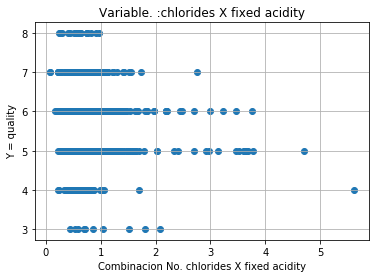

0     0.5624
1     0.7644
2     0.7176
3     0.8400
4     0.5624
5     0.5550
6     0.5451
7     0.4745
8     0.5694
9     0.5325
10    0.6499
dtype: float64


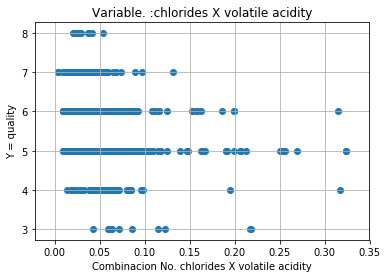

0     0.05320
1     0.08624
2     0.06992
3     0.02100
4     0.05320
5     0.04950
6     0.04140
7     0.04225
8     0.04234
9     0.03550
10    0.05626
dtype: float64


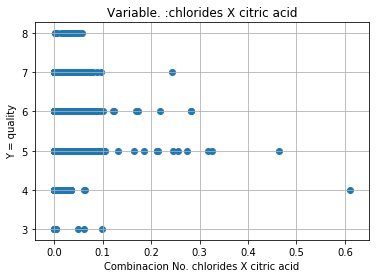

0     0.00000
1     0.00000
2     0.00368
3     0.04200
4     0.00000
5     0.00000
6     0.00414
7     0.00000
8     0.00146
9     0.02556
10    0.00776
dtype: float64


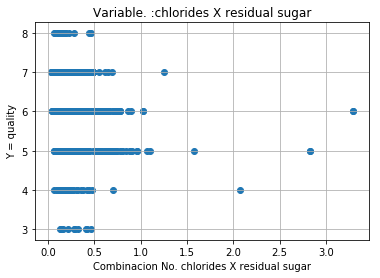

0     0.1444
1     0.2548
2     0.2116
3     0.1425
4     0.1444
5     0.1350
6     0.1104
7     0.0780
8     0.1460
9     0.4331
10    0.1746
dtype: float64


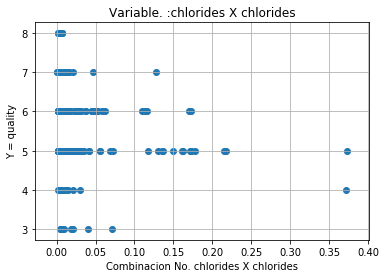

0     0.005776
1     0.009604
2     0.008464
3     0.005625
4     0.005776
5     0.005625
6     0.004761
7     0.004225
8     0.005329
9     0.005041
10    0.009409
Name: chlorides, dtype: float64


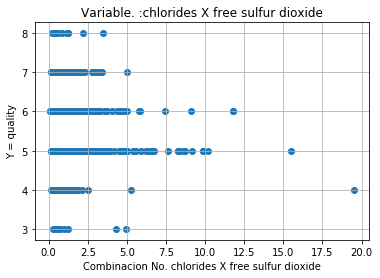

0     0.836
1     2.450
2     1.380
3     1.275
4     0.836
5     0.975
6     1.035
7     0.975
8     0.657
9     1.207
10    1.455
dtype: float64


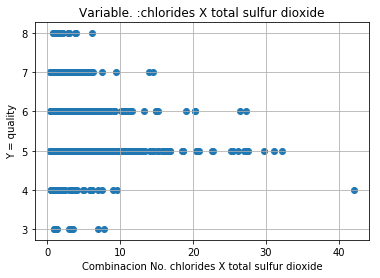

0     2.584
1     6.566
2     4.968
3     4.500
4     2.584
5     3.000
6     4.071
7     1.365
8     1.314
9     7.242
10    6.305
dtype: float64


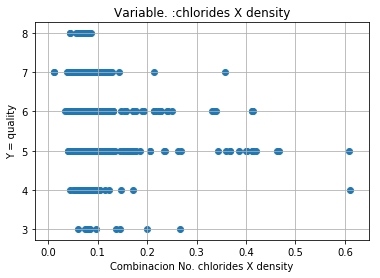

0     0.075833
1     0.097686
2     0.091724
3     0.074850
4     0.075833
5     0.074835
6     0.068752
7     0.064649
8     0.072766
9     0.070844
10    0.096602
dtype: float64


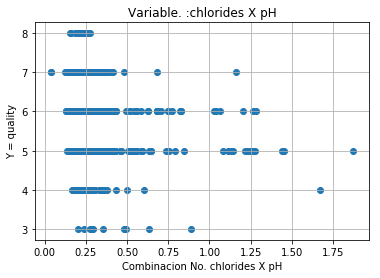

0     0.26676
1     0.31360
2     0.29992
3     0.23700
4     0.26676
5     0.26325
6     0.22770
7     0.22035
8     0.24528
9     0.23785
10    0.31816
dtype: float64


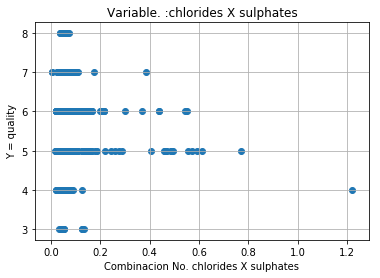

0     0.04256
1     0.06664
2     0.05980
3     0.04350
4     0.04256
5     0.04200
6     0.03174
7     0.03055
8     0.04161
9     0.05680
10    0.05238
dtype: float64


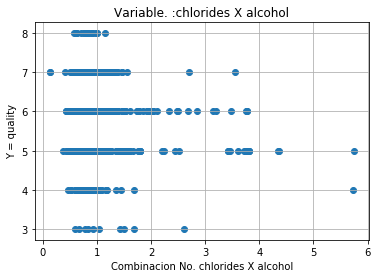

0     0.7144
1     0.9604
2     0.9016
3     0.7350
4     0.7144
5     0.7050
6     0.6486
7     0.6500
8     0.6935
9     0.7455
10    0.8924
dtype: float64


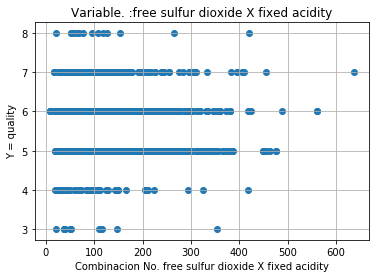

0      81.4
1     195.0
2     117.0
3     190.4
4      81.4
5      96.2
6     118.5
7     109.5
8      70.2
9     127.5
10    100.5
dtype: float64


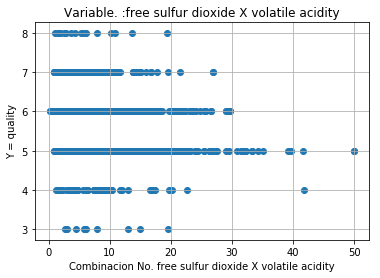

0      7.70
1     22.00
2     11.40
3      4.76
4      7.70
5      8.58
6      9.00
7      9.75
8      5.22
9      8.50
10     8.70
dtype: float64


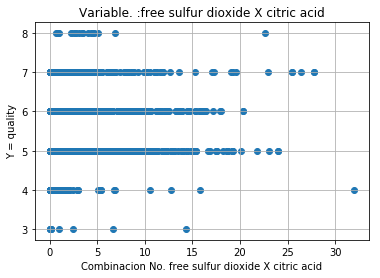

0     0.00
1     0.00
2     0.60
3     9.52
4     0.00
5     0.00
6     0.90
7     0.00
8     0.18
9     6.12
10    1.20
dtype: float64


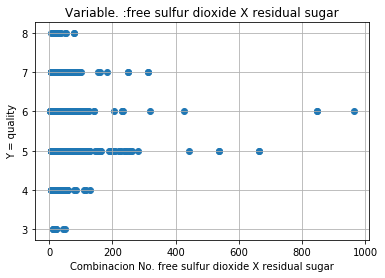

0      20.9
1      65.0
2      34.5
3      32.3
4      20.9
5      23.4
6      24.0
7      18.0
8      18.0
9     103.7
10     27.0
dtype: float64


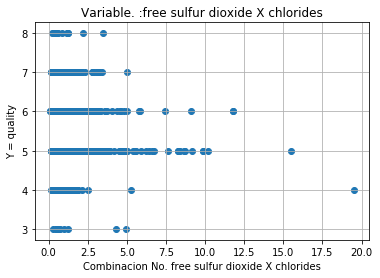

0     0.836
1     2.450
2     1.380
3     1.275
4     0.836
5     0.975
6     1.035
7     0.975
8     0.657
9     1.207
10    1.455
dtype: float64


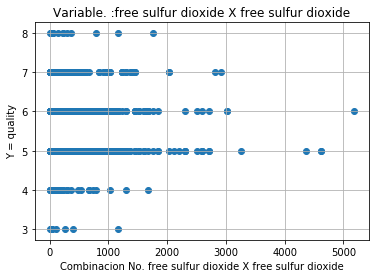

0     121.0
1     625.0
2     225.0
3     289.0
4     121.0
5     169.0
6     225.0
7     225.0
8      81.0
9     289.0
10    225.0
Name: free sulfur dioxide, dtype: float64


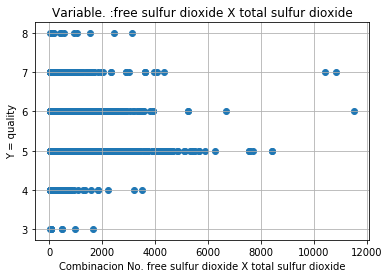

0      374.0
1     1675.0
2      810.0
3     1020.0
4      374.0
5      520.0
6      885.0
7      315.0
8      162.0
9     1734.0
10     975.0
dtype: float64


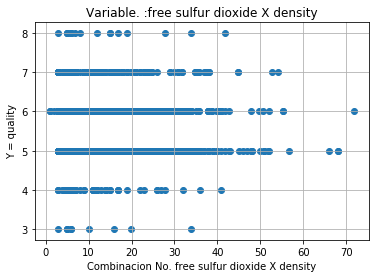

0     10.9758
1     24.9200
2     14.9550
3     16.9660
4     10.9758
5     12.9714
6     14.9460
7     14.9190
8      8.9712
9     16.9626
10    14.9385
dtype: float64


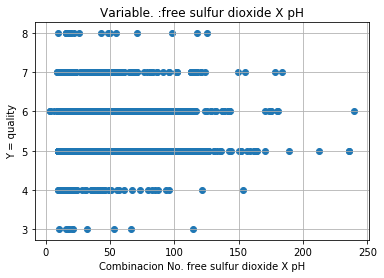

0     38.61
1     80.00
2     48.90
3     53.72
4     38.61
5     45.63
6     49.50
7     50.85
8     30.24
9     56.95
10    49.20
dtype: float64


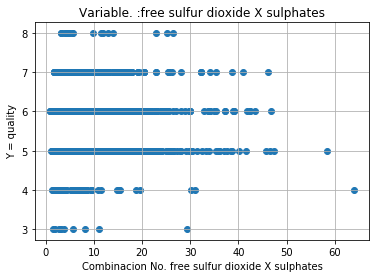

0      6.16
1     17.00
2      9.75
3      9.86
4      6.16
5      7.28
6      6.90
7      7.05
8      5.13
9     13.60
10     8.10
dtype: float64


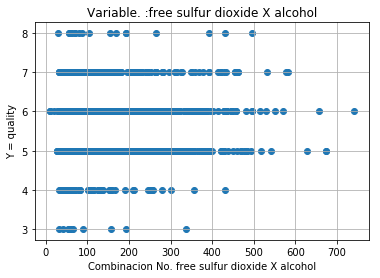

0     103.4
1     245.0
2     147.0
3     166.6
4     103.4
5     122.2
6     141.0
7     150.0
8      85.5
9     178.5
10    138.0
dtype: float64


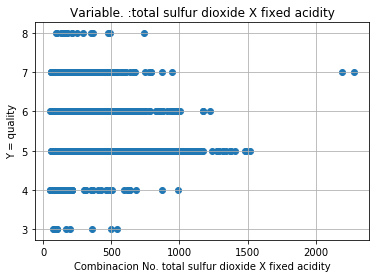

0     251.6
1     522.6
2     421.2
3     672.0
4     251.6
5     296.0
6     466.1
7     153.3
8     140.4
9     765.0
10    435.5
dtype: float64


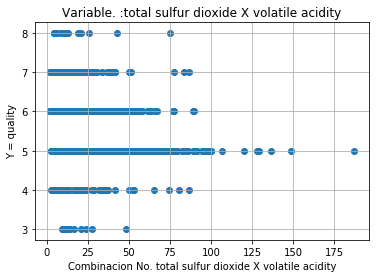

0     23.80
1     58.96
2     41.04
3     16.80
4     23.80
5     26.40
6     35.40
7     13.65
8     10.44
9     51.00
10    37.70
dtype: float64


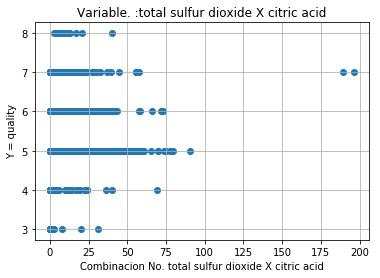

0      0.00
1      0.00
2      2.16
3     33.60
4      0.00
5      0.00
6      3.54
7      0.00
8      0.36
9     36.72
10     5.20
dtype: float64


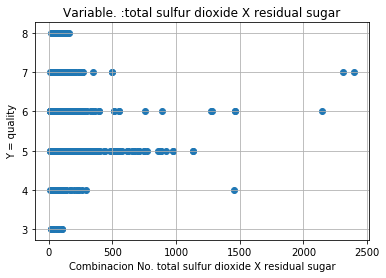

0      64.6
1     174.2
2     124.2
3     114.0
4      64.6
5      72.0
6      94.4
7      25.2
8      36.0
9     622.2
10    117.0
dtype: float64


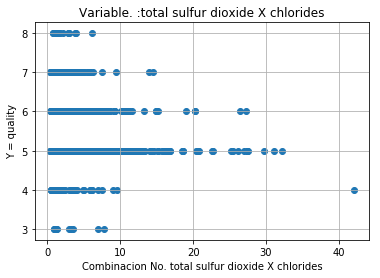

0     2.584
1     6.566
2     4.968
3     4.500
4     2.584
5     3.000
6     4.071
7     1.365
8     1.314
9     7.242
10    6.305
dtype: float64


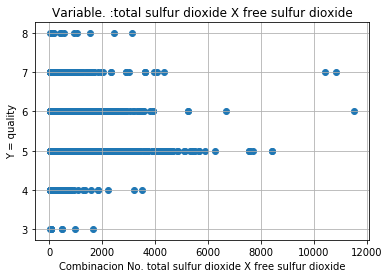

0      374.0
1     1675.0
2      810.0
3     1020.0
4      374.0
5      520.0
6      885.0
7      315.0
8      162.0
9     1734.0
10     975.0
dtype: float64


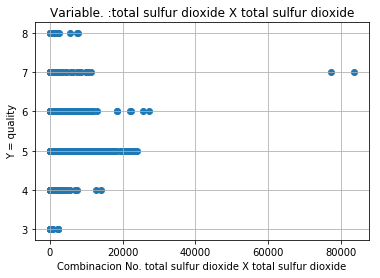

0      1156.0
1      4489.0
2      2916.0
3      3600.0
4      1156.0
5      1600.0
6      3481.0
7       441.0
8       324.0
9     10404.0
10     4225.0
Name: total sulfur dioxide, dtype: float64


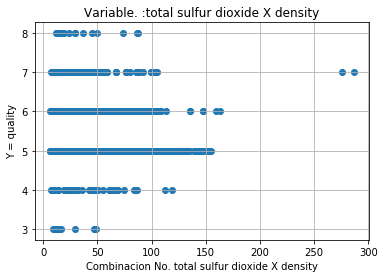

0      33.9252
1      66.7856
2      53.8380
3      59.8800
4      33.9252
5      39.9120
6      58.7876
7      20.8866
8      17.9424
9     101.7756
10     64.7335
dtype: float64


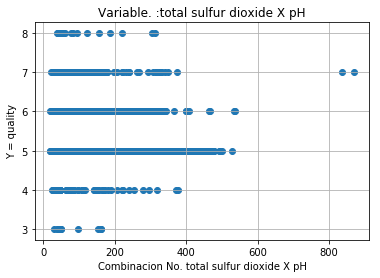

0     119.34
1     214.40
2     176.04
3     189.60
4     119.34
5     140.40
6     194.70
7      71.19
8      60.48
9     341.70
10    213.20
dtype: float64


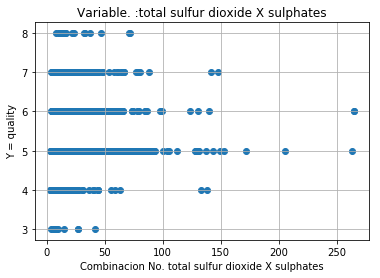

0     19.04
1     45.56
2     35.10
3     34.80
4     19.04
5     22.40
6     27.14
7      9.87
8     10.26
9     81.60
10    35.10
dtype: float64


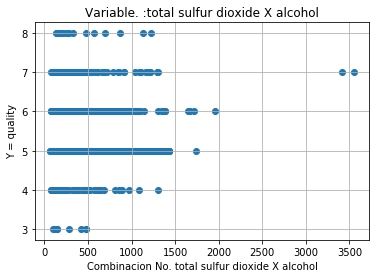

0      319.6
1      656.6
2      529.2
3      588.0
4      319.6
5      376.0
6      554.6
7      210.0
8      171.0
9     1071.0
10     598.0
dtype: float64


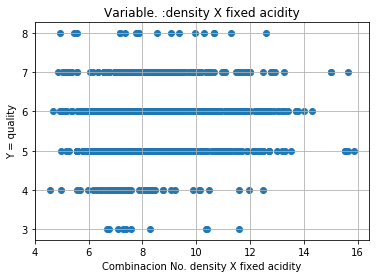

0      7.38372
1      7.77504
2      7.77660
3     11.17760
4      7.38372
5      7.38372
6      7.87156
7      7.26058
8      7.77504
9      7.48350
10     6.67253
dtype: float64


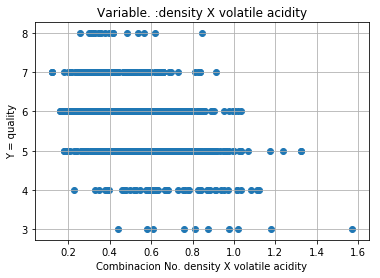

0     0.698460
1     0.877184
2     0.757720
3     0.279440
4     0.698460
5     0.658548
6     0.597840
7     0.646490
8     0.578144
9     0.498900
10    0.577622
dtype: float64


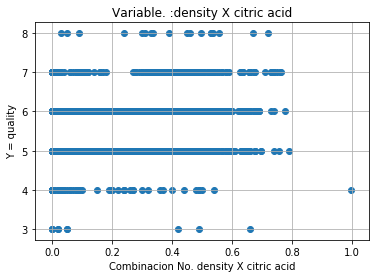

0     0.000000
1     0.000000
2     0.039880
3     0.558880
4     0.000000
5     0.000000
6     0.059784
7     0.000000
8     0.019936
9     0.359208
10    0.079672
dtype: float64


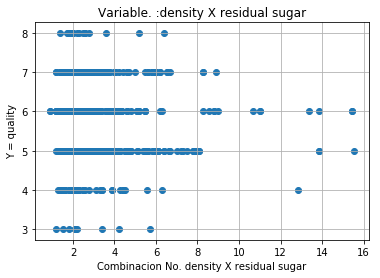

0     1.89582
1     2.59168
2     2.29310
3     1.89620
4     1.89582
5     1.79604
6     1.59424
7     1.19352
8     1.99360
9     6.08658
10    1.79262
dtype: float64


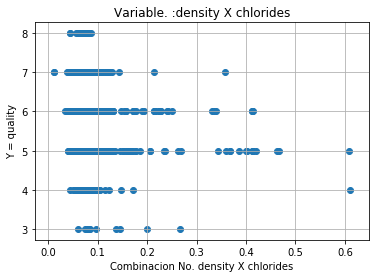

0     0.075833
1     0.097686
2     0.091724
3     0.074850
4     0.075833
5     0.074835
6     0.068752
7     0.064649
8     0.072766
9     0.070844
10    0.096602
dtype: float64


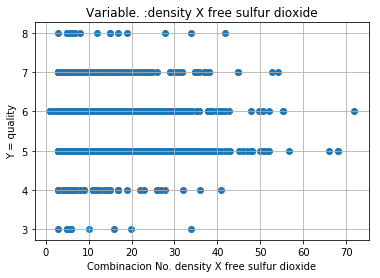

0     10.9758
1     24.9200
2     14.9550
3     16.9660
4     10.9758
5     12.9714
6     14.9460
7     14.9190
8      8.9712
9     16.9626
10    14.9385
dtype: float64


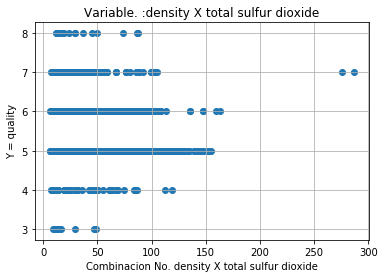

0      33.9252
1      66.7856
2      53.8380
3      59.8800
4      33.9252
5      39.9120
6      58.7876
7      20.8866
8      17.9424
9     101.7756
10     64.7335
dtype: float64


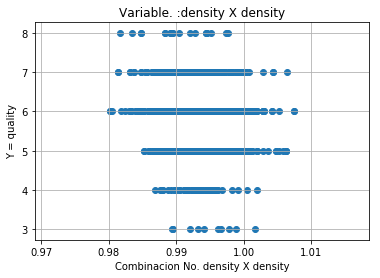

0     0.995605
1     0.993610
2     0.994009
3     0.996004
4     0.995605
5     0.995605
6     0.992813
7     0.989229
8     0.993610
9     0.995605
10    0.991817
Name: density, dtype: float64


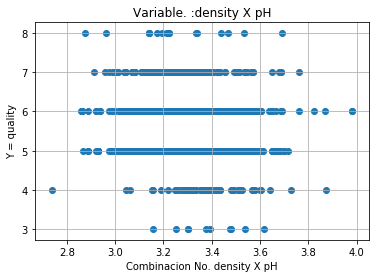

0     3.502278
1     3.189760
2     3.250220
3     3.153680
4     3.502278
5     3.502278
6     3.288120
7     3.371694
8     3.349248
9     3.342630
10    3.266552
dtype: float64


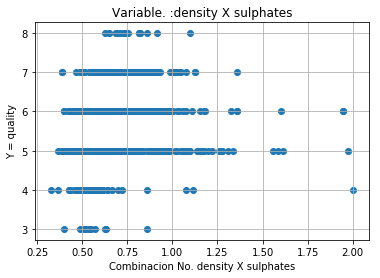

0     0.558768
1     0.677824
2     0.648050
3     0.578840
4     0.558768
5     0.558768
6     0.458344
7     0.467462
8     0.568176
9     0.798240
10    0.537786
dtype: float64


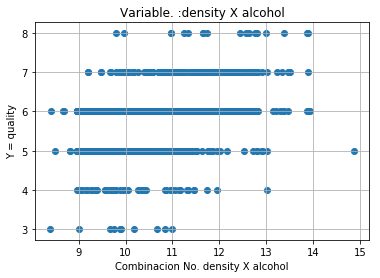

0      9.37932
1      9.76864
2      9.77060
3      9.78040
4      9.37932
5      9.37932
6      9.36616
7      9.94600
8      9.46960
9     10.47690
10     9.16228
dtype: float64


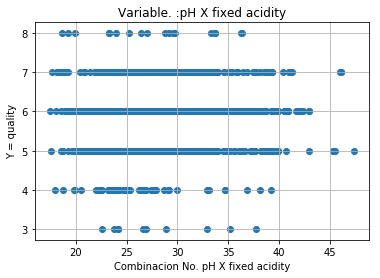

0     25.974
1     24.960
2     25.428
3     35.392
4     25.974
5     25.974
6     26.070
7     24.747
8     26.208
9     25.125
10    21.976
dtype: float64


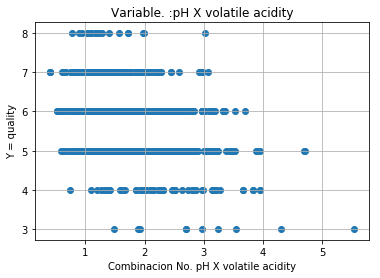

0     2.4570
1     2.8160
2     2.4776
3     0.8848
4     2.4570
5     2.3166
6     1.9800
7     2.2035
8     1.9488
9     1.6750
10    1.9024
dtype: float64


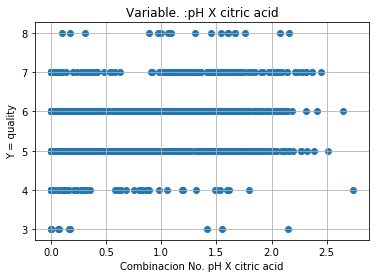

0     0.0000
1     0.0000
2     0.1304
3     1.7696
4     0.0000
5     0.0000
6     0.1980
7     0.0000
8     0.0672
9     1.2060
10    0.2624
dtype: float64


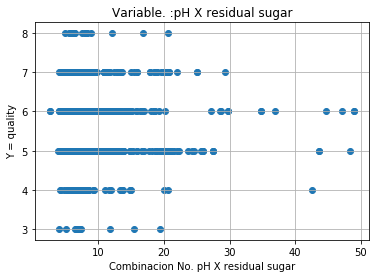

0      6.669
1      8.320
2      7.498
3      6.004
4      6.669
5      6.318
6      5.280
7      4.068
8      6.720
9     20.435
10     5.904
dtype: float64


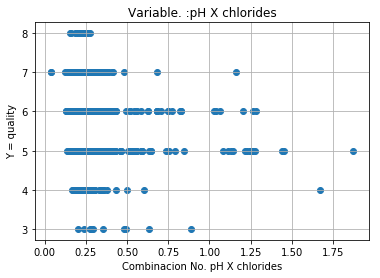

0     0.26676
1     0.31360
2     0.29992
3     0.23700
4     0.26676
5     0.26325
6     0.22770
7     0.22035
8     0.24528
9     0.23785
10    0.31816
dtype: float64


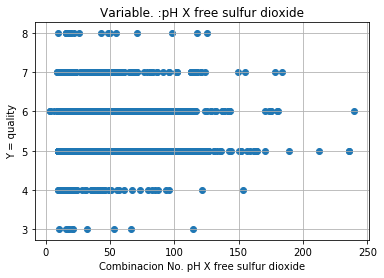

0     38.61
1     80.00
2     48.90
3     53.72
4     38.61
5     45.63
6     49.50
7     50.85
8     30.24
9     56.95
10    49.20
dtype: float64


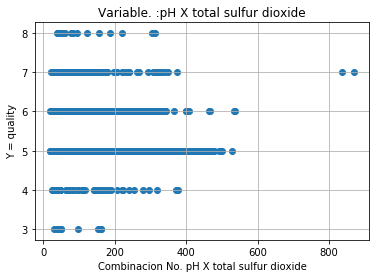

0     119.34
1     214.40
2     176.04
3     189.60
4     119.34
5     140.40
6     194.70
7      71.19
8      60.48
9     341.70
10    213.20
dtype: float64


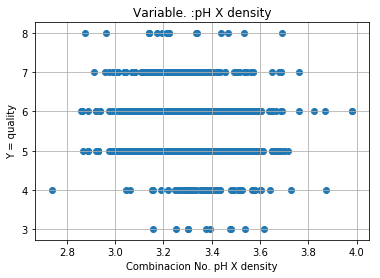

0     3.502278
1     3.189760
2     3.250220
3     3.153680
4     3.502278
5     3.502278
6     3.288120
7     3.371694
8     3.349248
9     3.342630
10    3.266552
dtype: float64


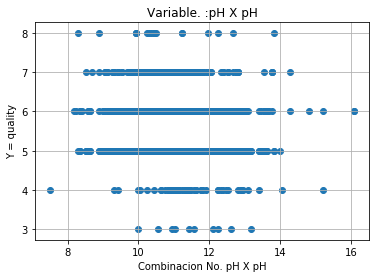

0     12.3201
1     10.2400
2     10.6276
3      9.9856
4     12.3201
5     12.3201
6     10.8900
7     11.4921
8     11.2896
9     11.2225
10    10.7584
Name: pH, dtype: float64


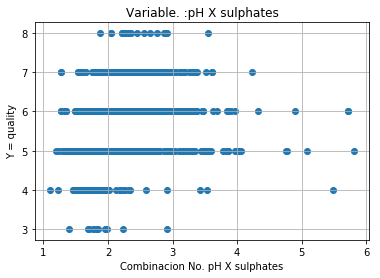

0     1.9656
1     2.1760
2     2.1190
3     1.8328
4     1.9656
5     1.9656
6     1.5180
7     1.5933
8     1.9152
9     2.6800
10    1.7712
dtype: float64


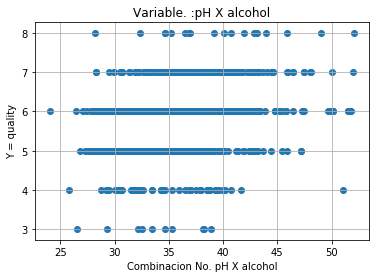

0     32.994
1     31.360
2     31.948
3     30.968
4     32.994
5     32.994
6     31.020
7     33.900
8     31.920
9     35.175
10    30.176
dtype: float64


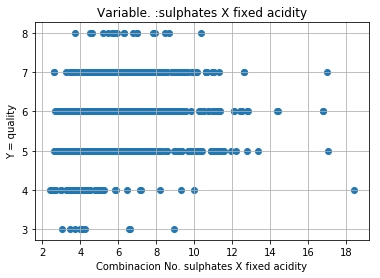

0     4.144
1     5.304
2     5.070
3     6.496
4     4.144
5     4.144
6     3.634
7     3.431
8     4.446
9     6.000
10    3.618
dtype: float64


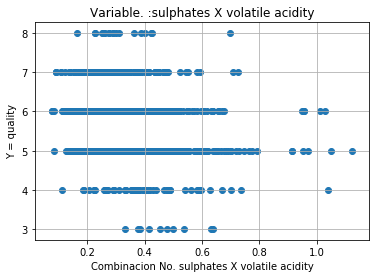

0     0.3920
1     0.5984
2     0.4940
3     0.1624
4     0.3920
5     0.3696
6     0.2760
7     0.3055
8     0.3306
9     0.4000
10    0.3132
dtype: float64


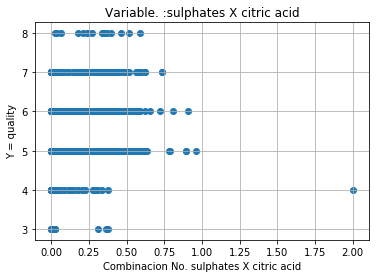

0     0.0000
1     0.0000
2     0.0260
3     0.3248
4     0.0000
5     0.0000
6     0.0276
7     0.0000
8     0.0114
9     0.2880
10    0.0432
dtype: float64


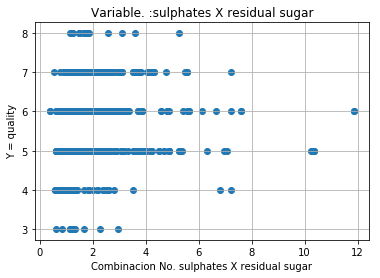

0     1.064
1     1.768
2     1.495
3     1.102
4     1.064
5     1.008
6     0.736
7     0.564
8     1.140
9     4.880
10    0.972
dtype: float64


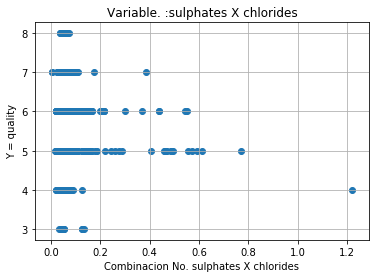

0     0.04256
1     0.06664
2     0.05980
3     0.04350
4     0.04256
5     0.04200
6     0.03174
7     0.03055
8     0.04161
9     0.05680
10    0.05238
dtype: float64


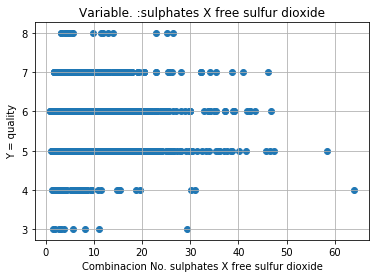

0      6.16
1     17.00
2      9.75
3      9.86
4      6.16
5      7.28
6      6.90
7      7.05
8      5.13
9     13.60
10     8.10
dtype: float64


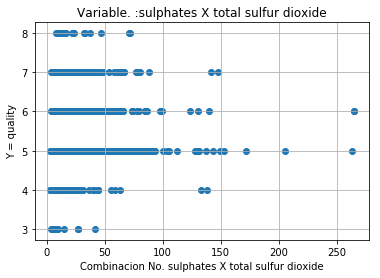

0     19.04
1     45.56
2     35.10
3     34.80
4     19.04
5     22.40
6     27.14
7      9.87
8     10.26
9     81.60
10    35.10
dtype: float64


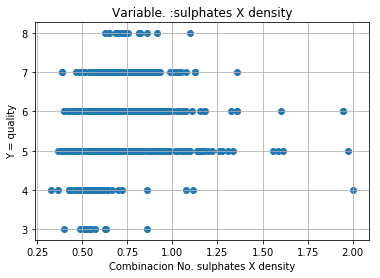

0     0.558768
1     0.677824
2     0.648050
3     0.578840
4     0.558768
5     0.558768
6     0.458344
7     0.467462
8     0.568176
9     0.798240
10    0.537786
dtype: float64


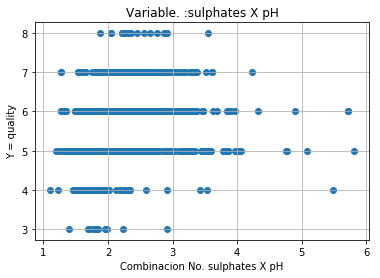

0     1.9656
1     2.1760
2     2.1190
3     1.8328
4     1.9656
5     1.9656
6     1.5180
7     1.5933
8     1.9152
9     2.6800
10    1.7712
dtype: float64


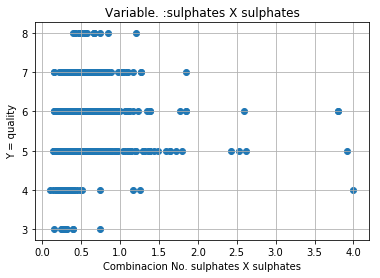

0     0.3136
1     0.4624
2     0.4225
3     0.3364
4     0.3136
5     0.3136
6     0.2116
7     0.2209
8     0.3249
9     0.6400
10    0.2916
Name: sulphates, dtype: float64


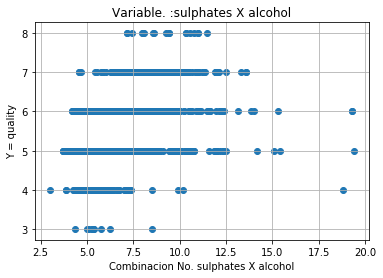

0     5.264
1     6.664
2     6.370
3     5.684
4     5.264
5     5.264
6     4.324
7     4.700
8     5.415
9     8.400
10    4.968
dtype: float64


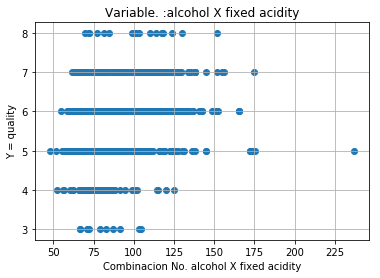

0      69.56
1      76.44
2      76.44
3     109.76
4      69.56
5      69.56
6      74.26
7      73.00
8      74.10
9      78.75
10     61.64
dtype: float64


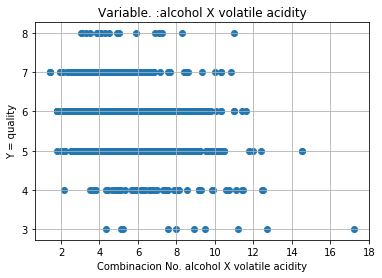

0     6.580
1     8.624
2     7.448
3     2.744
4     6.580
5     6.204
6     5.640
7     6.500
8     5.510
9     5.250
10    5.336
dtype: float64


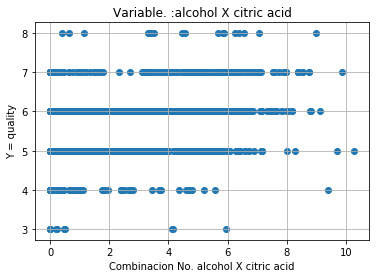

0     0.000
1     0.000
2     0.392
3     5.488
4     0.000
5     0.000
6     0.564
7     0.000
8     0.190
9     3.780
10    0.736
dtype: float64


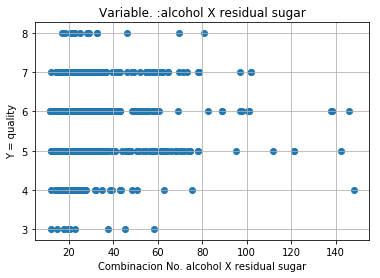

0     17.86
1     25.48
2     22.54
3     18.62
4     17.86
5     16.92
6     15.04
7     12.00
8     19.00
9     64.05
10    16.56
dtype: float64


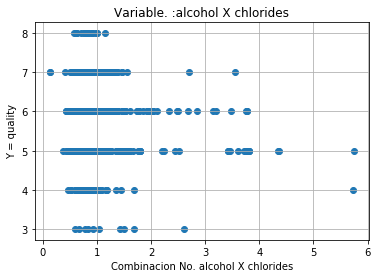

0     0.7144
1     0.9604
2     0.9016
3     0.7350
4     0.7144
5     0.7050
6     0.6486
7     0.6500
8     0.6935
9     0.7455
10    0.8924
dtype: float64


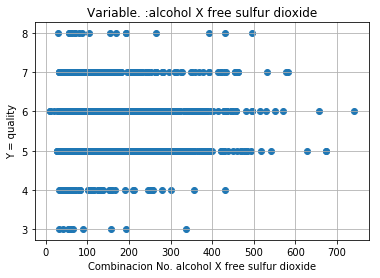

0     103.4
1     245.0
2     147.0
3     166.6
4     103.4
5     122.2
6     141.0
7     150.0
8      85.5
9     178.5
10    138.0
dtype: float64


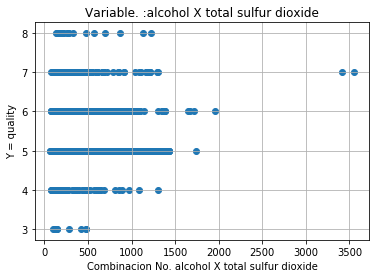

0      319.6
1      656.6
2      529.2
3      588.0
4      319.6
5      376.0
6      554.6
7      210.0
8      171.0
9     1071.0
10     598.0
dtype: float64


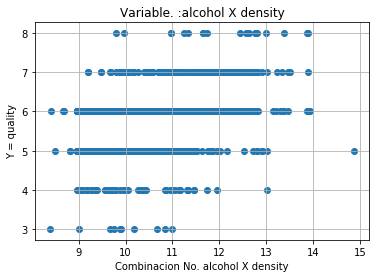

0      9.37932
1      9.76864
2      9.77060
3      9.78040
4      9.37932
5      9.37932
6      9.36616
7      9.94600
8      9.46960
9     10.47690
10     9.16228
dtype: float64


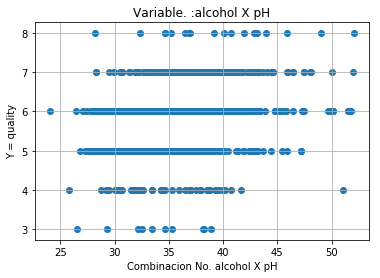

0     32.994
1     31.360
2     31.948
3     30.968
4     32.994
5     32.994
6     31.020
7     33.900
8     31.920
9     35.175
10    30.176
dtype: float64


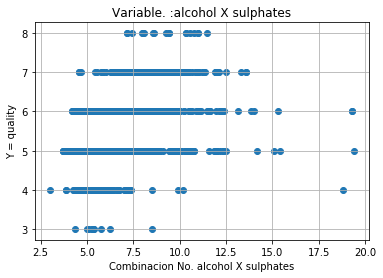

0     5.264
1     6.664
2     6.370
3     5.684
4     5.264
5     5.264
6     4.324
7     4.700
8     5.415
9     8.400
10    4.968
dtype: float64


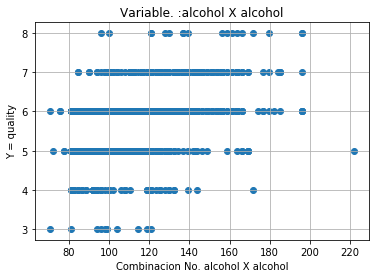

0      88.36
1      96.04
2      96.04
3      96.04
4      88.36
5      88.36
6      88.36
7     100.00
8      90.25
9     110.25
10     84.64
Name: alcohol, dtype: float64


In [58]:
for j in range (11):
    lista01 = []
    for i in range(11):
        lista01.append(data[dictX[j]]*data[dictX[i]])
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.grid()
        ax.scatter(lista01[i],Y_real,label='Variable. :'+str(j)+' X '+str(i))

        ax.set_xlabel('Combinacion No. '+str(dictX[j])+' X '+str(dictX[i]))
        ax.set_ylabel('Y = quality')
        ax.set_title('Variable. :'+str(dictX[j])+' X '+str(dictX[i]))
        plt.show()
        print(lista01[i][0:11])


IndexError: list index out of range

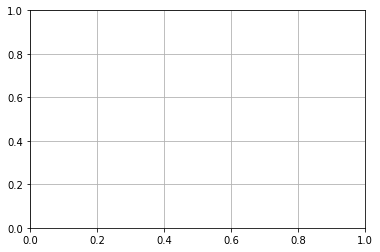

In [41]:
lista01 = []
for i in range(11):
    #lista01.append(data[dictX[j]]*data[dictX[i]])
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid()
    ax.scatter(lista01[i],Y_real,label='Variable. :'+str(j)+' X '+str(i))
    ax.set_xlabel('Combinacion No. '+str(j)+' X '+str(i))
    ax.set_ylabel('Y = quality')
    ax.set_title('Variable. :'+str(j)+' X '+str(i))
    plt.show()

In [47]:
pandasDF = data['quality'].head(10)
pandasDF02 = data['fixed acidity'].head(10)
prueba01 = np.array([1,2,3])
prueba02 = np.array([4,5,6])

In [48]:
print(prueba01*prueba02)

[ 4 10 18]


In [49]:
pandasDF

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [52]:
pandasDF02

0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
5     7.4
6     7.9
7     7.3
8     7.8
9     7.5
Name: fixed acidity, dtype: float64

In [50]:
listaPanda = []
listaPanda.append(pandasDF*pandasDF02)

In [51]:
listaPanda

[0    37.0
 1    39.0
 2    39.0
 3    67.2
 4    37.0
 5    37.0
 6    39.5
 7    51.1
 8    54.6
 9    37.5
 dtype: float64]